La energía se puede expresar como:


$$
E= \frac{1}{2}m_1\dot{x}^2 + \frac{1}{2}m_z\dot{y}^2+\frac{1}{2}k(x^2+y^2)
$$
En terminos de su momento,
$$
E= \frac{1}{2}\frac{{P_x}^2}{m_1} + \frac{1}{2}\frac{{P_y}^2}{m_2}+\frac{1}{2}k(x^2+y^2)
$$
donde
$$
\dot{P_x}=-kx
$$
$$
\dot{x}=\frac{P_x}{m_1}
$$

$$
\dot{P_y}=-ky
$$
$$
\dot{y}=\frac{P_y}{m_2}
$$

$$
E=\frac{1}{2}(\frac{P_x^2}{m_1} + \frac{P_y^2}{m_2})+V(x,y)= \frac{1}{2}\frac{1}{m_1}(P_x^2 + \epsilon P_y^2)-\frac{k}{\sqrt{x^r+y^2}}
$$

La condición anterior nos habla de la conservación de la energía... súper importante checar que esto se cumpla por siempre. 


donde $\epsilon=\frac{m_1}{m_2}$

si $v=-\frac{k}{r}=-\frac{k}{{x^2+y^2}^{1/2}}$
$$
\dot{P_x}=-\frac{x}{{x^2+y^2}^{3/2}}
$$
$$
\dot{x}={P_x}
$$

$$
\dot{P_y}=-\frac{y}{{x^2+y^2}^{3/2}}
$$
$$
\dot{y}=\epsilon{P_y}
$$

In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def ec_mov(x_p,t,epsilon=1): #x_p seran las entradas de posicion y momento
    #x_p =[x,y,px,py]
    
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5) #r32 es r a la tres medios... que originales
    dx = x_p[2]
    dy = epsilon*x_p[3]
    dpx = -x_p[0]/r32
    dpy = -x_p[1]/r32
    
    return array([dx,dy,dpx,dpy])

In [3]:
def energia(x_p , epsilon=1. ):
    r = sqrt(x_p[0]**2 + x_p[1]**2)
    E = 0.5*(x_p[2]**2 + epsilon*x_p[3]**2) - 1./r
    return E

def cond_ini(alfa,var=0.001):
    angulo = alfa+var*(2.*rand()-1.)
    x,y = cos(angulo),sin(angulo)
    return array([x,y,1.,0.])

def p_rho(x_p): #perro
    
    x,y,px,py = x_p[:,0] , x_p[:,1] , x_p[:,2] , x_p[:,3]
    r = sqrt(x_p[:,0]**2 + x_p[:,1]**2)
    pr = (x*px+y*py)/r
    
    return pr,r

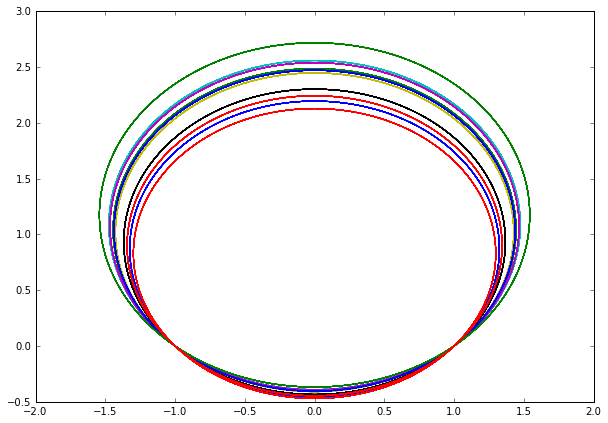

In [4]:
t = arange(0,100,0.0001)
plt.figure(figsize=(10,7))
eps = 1.

for i in range(10):
    punto_ini = cond_ini(pi/4 , 0.1)
    sol = odeint(ec_mov , punto_ini , t , args=(eps,) , atol = 1e-9 , rtol = 1e-9)
    
    #plot(sol[:,0],sol[:,1])
    plot(sol[:,2],sol[:,3])
    #print "E=", energia(punto_ini) ,       "E_f=" , energia(sol[-1])
show()

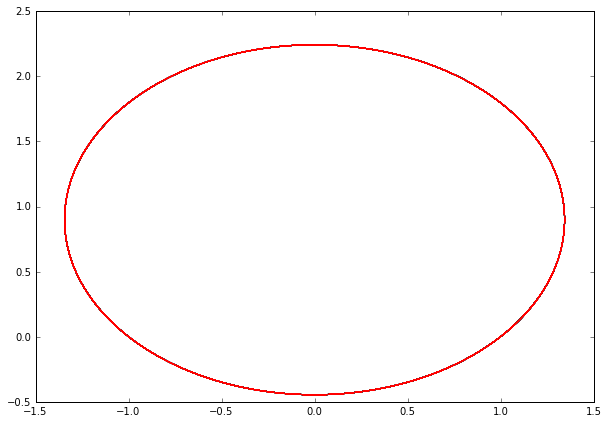

In [5]:
t = arange(0,100,0.0001)
plt.figure(figsize=(10,7))
eps = 1.5

for i in range(10):
    punto_ini = cond_ini(pi/4 , 0.1)
    sol_1 = odeint(ec_mov , punto_ini , t , args=(eps,) , atol = 1e-9 , rtol = 1e-9)
    
    #plot(sol[:,0],sol[:,1])
    plot(sol[:,2],sol[:,3])
    #print "E=", energia(punto_ini) ,       "E_f=" , energia(sol[-1])
show()

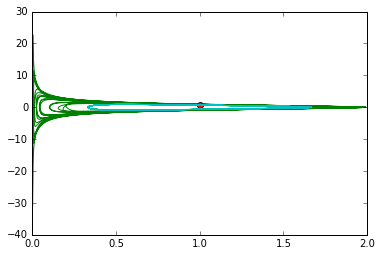

In [6]:
pr_1,r_1 = p_rho(sol_1)

plot(r_1[0],pr_1[0],'o')
plot(r_1,pr_1)

pr,r = p_rho(sol)

plot(r[0],pr[0],'o')
plot(r,pr)
show()

In [7]:
def root_trayec1(fun,p_i,ti,error=1e-5):
    while abs(p_i[0])> error:
        bla = ti -(p_i[0]/p_i[2])
        paso = odeint(fun,p_i,[ti,bla])
        ti,p_i=bla,paso[-1]
    return ti,p_i